In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
from scipy.optimize import curve_fit

In [2]:
# quantile/ percentile
a = 0.95

In [3]:
data = pd.read_csv('data/vt_oredrtraf.csv',sep='\t')

In [46]:
data.head()

,user_id,product_id,create_time,create_time_next,ordertype,ts,freq,route_name,product_line_type_name,route_class_parent_name
0,75141256,5037388,2018-03-29 13:25:58,2018-03-29 13:25:58,1,1,1,中航快捷酒店(北京东四店),境内,酒店
1,63064290,5037808,2018-04-02 10:34:41,2018-04-03 12:31:54,2,1,1,斯洛主题酒店(北京南站店),境内,酒店
2,58070548,5037808,2018-04-02 15:29:45,2018-04-06 07:47:28,1,1,8,斯洛主题酒店(北京南站店),境内,酒店
3,63064290,5037808,2018-04-02 10:34:41,2018-04-03 12:31:54,1,1,2,斯洛主题酒店(北京南站店),境内,酒店
4,51243576,5037808,2018-04-04 07:58:35,2018-04-04 09:50:36,1,1,2,斯洛主题酒店(北京南站店),境内,酒店


In [86]:
data.describe()

,user_id,product_id,ordertype,ts,freq
count,4.190100e+05,4.190100e+05,419010.000000,419010.000000,419010.000000
mean,5.093896e+07,4.288416e+07,1.461244,8.635493,9.266831
std,2.438688e+07,8.071910e+07,0.729102,13.267525,18.194435
min,6.900000e+01,5.037388e+06,1.000000,1.000000,1.000000
25%,3.133160e+07,5.190022e+06,1.000000,1.000000,2.000000
50%,5.926529e+07,5.190022e+06,1.000000,1.000000,4.000000
75%,7.214187e+07,5.709894e+06,2.000000,10.000000,10.000000
max,2.000009e+09,3.002000e+08,3.000000,59.000000,1881.000000


In [48]:
"""
product_line_type_name 
境内：  国内酒店  火车票 汽车票 用车服务
境外：  衍生品 通信  国际酒店 机票
国内当地参团： 跟团游
出境：  签证


route_class_parent_name
火车票： 境内
酒店： 境内 境外
汽车票： 境内
门票： NULL
签证： 出境
邮轮： 出境短线  国内长线（很少）
目的地服务： 出境短线      国内长线 出境长线(很少)
用车服务： 境内
衍生品：境外


由于所有路线的火车票都是一个品类，所以火车票犹豫期不太可靠，根据经验用户应该只关注一天

"""


'\nproduct_line_type_name \n境内：  国内酒店  火车票 汽车票 用车服务\n境外：  衍生品 通信  国际酒店 机票\n国内当地参团： 跟团游\n出境：  签证\n\n\nroute_class_parent_name\n火车票： 境内\n酒店： 境内 境外\n汽车票： 境内\n门票： NULL\n签证： 出境\n邮轮： 出境短线  国内长线（很少）\n目的地服务： 出境短线      国内长线 出境长线(很少)\n用车服务： 境内\n衍生品：境外\n\n\n由于所有路线的火车票都是一个品类，所有火车票犹豫期不太可靠，根据经验用户应该只关注一天\n\n\n\n'

In [49]:
data.product_line_type_name.value_counts()

境内        253924
国内机票       73656
周边         34825
国内长线       17255
境外         14446
出境短线        9615
出境长线        4241
国内当地参团      2496
出境          1863
新疆             5
欧洲             1
Name: product_line_type_name, dtype: int64

In [50]:
data.route_class_parent_name.value_counts()

火车票      197134
机票        87039
跟团游       55924
酒店        45102
汽车票       10555
自助游        6298
自驾游        4843
门票         3207
签证         1864
用车服务       1275
衍生品         875
目的地服务       631
邮轮          622
定制游          54
通信           51
团队游          32
旅拍           28
Name: route_class_parent_name, dtype: int64

In [51]:
routetypes = ['出境长线','出境短线','国内长线','周边','国内当地参团','出境','境外','境内','国内机票']
producttypes=['跟团游','自助游','自驾游','门票','签证','火车票','酒店','汽车票','用车服务','目的地服务','衍生品','邮轮']

In [52]:
for product in producttypes:
    sample = data.loc[data.route_class_parent_name==product,['freq','ts']]
    print("-------{0}--------".format(product))
    print(sample.describe())
    print(" ")
    print('{0}分位数：'.format(a))
    print(sample.quantile(a))
    print(" ")

-------跟团游--------
               freq            ts
count  55924.000000  55924.000000
mean       7.173682      5.370986
std       10.009357      9.075068
min        1.000000      1.000000
25%        2.000000      1.000000
50%        5.000000      1.000000
75%        9.000000      5.000000
max     1076.000000     59.000000
 
0.95分位数：
freq    22.0
ts      27.0
Name: 0.95, dtype: float64
 
-------自助游--------
              freq           ts
count  6298.000000  6298.000000
mean     14.478882     5.751032
std      26.370582     9.499878
min       1.000000     1.000000
25%       4.000000     1.000000
50%       8.000000     1.000000
75%      16.000000     5.000000
max     867.000000    58.000000
 
0.95分位数：
freq    48.0
ts      28.0
Name: 0.95, dtype: float64
 
-------自驾游--------
              freq           ts
count  4843.000000  4843.000000
mean      8.940946     3.445385
std      10.426778     6.772553
min       1.000000     1.000000
25%       3.000000     1.000000
50%       6.000000     1.

In [53]:
for route in routetypes:
    sample = data.loc[data.product_line_type_name==route,['freq','ts']]
    print("-------{0}--------".format(route))
    print(sample.describe())
    print(" ")
    print('{0}分位数：'.format(a))
    print(sample.quantile(a))
    print(" ")

-------出境长线--------
              freq           ts
count  4241.000000  4241.000000
mean     10.306060    10.802877
std      20.563768    13.244999
min       1.000000     1.000000
25%       3.000000     1.000000
50%       6.000000     4.000000
75%      13.000000    18.000000
max    1076.000000    57.000000
 
0.95分位数：
freq    33.0
ts      40.0
Name: 0.95, dtype: float64
 
-------出境短线--------
              freq           ts
count  9615.000000  9615.000000
mean     10.625065     7.523661
std      18.917027    10.828054
min       1.000000     1.000000
25%       3.000000     1.000000
50%       6.000000     2.000000
75%      12.000000     9.000000
max     867.000000    58.000000
 
0.95分位数：
freq    33.0
ts      32.0
Name: 0.95, dtype: float64
 
-------国内长线--------
               freq            ts
count  17255.000000  17255.000000
mean      10.175543      5.181455
std       14.754958      8.802374
min        1.000000      1.000000
25%        3.000000      1.000000
50%        6.000000      1.0

In [54]:
sample = data.loc[data.route_class_parent_name=="自驾游",'ts']

In [55]:
sample.describe()

count    4843.000000
mean        3.445385
std         6.772553
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        57.000000
Name: ts, dtype: float64

In [56]:
sample.quantile(0.95)

16.0

In [57]:
sample= sample[sample<19]

In [58]:
sample.describe()

count    4629.000000
mean        2.204364
std         2.901609
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        18.000000
Name: ts, dtype: float64

In [59]:
0.75**2

0.5625

In [60]:
sample2 = data.loc[data.product_line_type_name=="周边",'ts']

In [61]:
sample2.describe()

count    34825.000000
mean         4.080144
std          7.447410
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         59.000000
Name: ts, dtype: float64

In [62]:
sample2.quantile(0.95)

20.0

In [63]:
sample2= sample2[sample2<15]

In [64]:
sample2.describe()

count    32106.000000
mean         2.200648
std          2.601351
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         14.000000
Name: ts, dtype: float64

# 目的地大类与品类交叉维度

In [65]:
routetypes = ['出境长线','出境短线','国内长线','周边']
producttypes=['跟团游','自助游','自驾游']

In [66]:
for route in routetypes:
    for product in producttypes:
        sample = data.loc[(data.product_line_type_name==route)&(data.route_class_parent_name==product)&(data.ts>0),'ts']
        print("-------{0}+{1}--------".format(route, product))
        print(sample.describe())
        print(" ")
        print('{0}分位数：'.format(a),sample.quantile(a))
        print(" ")

-------出境长线+跟团游--------
count    3859.000000
mean       11.067893
std        13.399939
min         1.000000
25%         1.000000
50%         4.000000
75%        18.000000
max        57.000000
Name: ts, dtype: float64
 
0.95分位数： 41.0
 
-------出境长线+自助游--------
count    307.000000
mean       8.788274
std       11.761413
min        1.000000
25%        1.000000
50%        3.000000
75%       13.000000
max       54.000000
Name: ts, dtype: float64
 
0.95分位数： 38.0
 
-------出境长线+自驾游--------
count     2.000000
mean      9.000000
std      11.313708
min       1.000000
25%       5.000000
50%       9.000000
75%      13.000000
max      17.000000
Name: ts, dtype: float64
 
0.95分位数： 16.2
 
-------出境短线+跟团游--------
count    6730.000000
mean        7.746360
std        11.123004
min         1.000000
25%         1.000000
50%         2.000000
75%         9.000000
max        58.000000
Name: ts, dtype: float64
 
0.95分位数： 33.0
 
-------出境短线+自助游--------
count    1750.000000
mean        7.858857
std        10.9196

In [67]:
for route in routetypes:
    for product in producttypes:
        sample = data.loc[(data.product_line_type_name==route)&(data.route_class_parent_name==product)&(data.ts>0),'freq']
        print("-------{0}+{1}--------".format(route, product))
        print(sample.describe())
        print(" ")
        print('{0}分位数：'.format(a),sample.quantile(a))
        print(" ")

-------出境长线+跟团游--------
count    3859.000000
mean       10.107800
std        20.884009
min         1.000000
25%         3.000000
50%         6.000000
75%        12.000000
max      1076.000000
Name: freq, dtype: float64
 
0.95分位数： 31.0
 
-------出境长线+自助游--------
count    307.000000
mean      13.765472
std       18.370827
min        1.000000
25%        3.000000
50%        8.000000
75%       17.000000
max      156.000000
Name: freq, dtype: float64
 
0.95分位数： 45.39999999999998
 
-------出境长线+自驾游--------
count     2.000000
mean     11.000000
std       9.899495
min       4.000000
25%       7.500000
50%      11.000000
75%      14.500000
max      18.000000
Name: freq, dtype: float64
 
0.95分位数： 17.299999999999997
 
-------出境短线+跟团游--------
count    6730.000000
mean        8.938782
std        10.590493
min         1.000000
25%         3.000000
50%         6.000000
75%        11.000000
max       177.000000
Name: freq, dtype: float64
 
0.95分位数： 28.0
 
-------出境短线+自助游--------
count    1750.000000
mean

## 产品衰减图

In [68]:
sample=data.ts

In [69]:
sample.quantile(0.95)

40.0

In [71]:
sample.describe()

count    419010.000000
mean          8.635493
std          13.267525
min           1.000000
25%           1.000000
50%           1.000000
75%          10.000000
max          59.000000
Name: ts, dtype: float64

In [88]:
sample.quantile(a)

40.0

In [145]:
print(sum(sample.value_counts()))

419010


In [72]:
ts = sample.value_counts().index.tolist()
amount = (sample.value_counts()/sum(sample.value_counts())).tolist()

In [73]:
sum(sample.value_counts())

419010

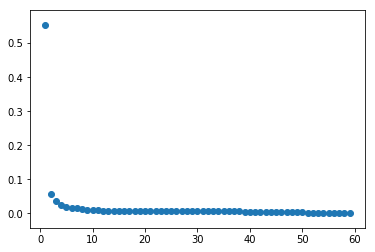

In [75]:
plt.scatter(ts,amount)

In [76]:
sample.describe()

count    419010.000000
mean          8.635493
std          13.267525
min           1.000000
25%           1.000000
50%           1.000000
75%          10.000000
max          59.000000
Name: ts, dtype: float64

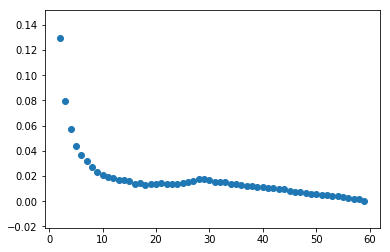

In [78]:
ts2 = sample.value_counts().index.tolist()[1:]
sample2 = sample.value_counts().tolist()[1:]
amount2 = ((np.array(sample2))/sum(sample2)).tolist()
plt.scatter(ts2,amount2)

## 构造兴趣度，构造全局产品兴趣度模型

In [ ]:
sample=data.ts
ts = sample.value_counts().index.tolist()
amount = (sample.value_counts()/sum(sample.value_counts())).tolist()

In [151]:
"""构建兴趣度"""
amount_j = []
j=0
for i in amount:
    j = j+i
    amount_j.append(j)

In [153]:
len(amount_j)

59

In [157]:
usr_inter = 1-np.array(amount_j)

In [169]:
print(usr_inter[0:10])

[0.44645474 0.38849908 0.35313238 0.32759123 0.30814539 0.29170187
 0.27729887 0.26515835 0.25477674 0.24534975]


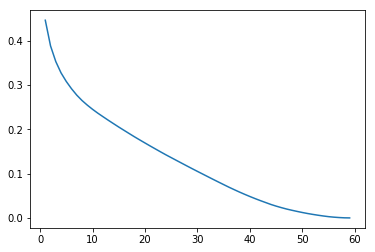

In [166]:
plt.plot(np.arange(1,60),[i for i in usr_inter])

In [16]:
def func(x,a):  
    return  0.45*(a**(x-1))

0.9380639013760886


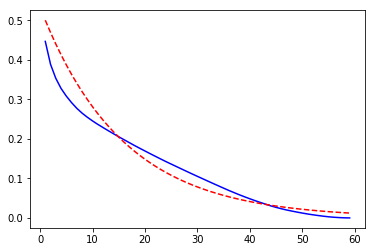

In [171]:
x=ts
y=usr_inter
plt.plot(x,y,'b-')  
popt, pcov = curve_fit(func, x, y)  
#popt数组中，三个值分别是待求参数a,b,c
print(popt[0])
y2 = [func(i, popt[0]) for i in x]  
plt.plot(x,y2,'r--')

In [178]:
0.45*(0.938**(10-1))

0.25295196599655967

## 根据目的地大类划分

In [18]:
def func(x,a, b):  
    return  b*(a**(x-1))

In [118]:
routetypes = ['出境长线','出境短线','国内长线','周边','国内当地参团','出境','境外','境内','国内机票']

In [119]:
samples = {}
for route in routetypes:
    sample = data.loc[data.product_line_type_name==route,['ts']]
    samples[route]=sample

In [120]:
info1 = {}
for route in routetypes:
    info2 = {}
    ts=samples[route]['ts'].value_counts().index.tolist()
    amount = (samples[route]['ts'].value_counts()/sum(samples[route]['ts'].value_counts())).tolist()
    info2['ts']=ts
    info2['amount']=amount
    info1[route]=info2

In [121]:
usr_inter_prd={}
for route in routetypes:
    sample = info1[route]['amount']
    """构建兴趣度"""
    amount_j = []
    j=0
    for i in sample:
        j = j+i
        amount_j.append(j)
    usr_inter = 1-np.array(amount_j)
    usr_inter_prd[route]=usr_inter

In [122]:
usr_inter_prd['出境长线']

array([ 6.55505777e-01,  5.71799104e-01,  5.10257015e-01,  4.71351096e-01,
        4.39518981e-01,  4.14289083e-01,  3.90238151e-01,  3.68073568e-01,
        3.49681679e-01,  3.33647725e-01,  3.18321151e-01,  3.04645131e-01,
        2.91204905e-01,  2.78236265e-01,  2.65267626e-01,  2.52534780e-01,
        2.41216694e-01,  2.29898609e-01,  2.18580523e-01,  2.07734025e-01,
        1.96887527e-01,  1.86276822e-01,  1.75666116e-01,  1.65291205e-01,
        1.55152087e-01,  1.45248762e-01,  1.35581231e-01,  1.26149493e-01,
        1.18132516e-01,  1.10351332e-01,  1.02570149e-01,  9.52605518e-02,
        8.84225419e-02,  8.15845320e-02,  7.52181089e-02,  6.88516859e-02,
        6.27210564e-02,  5.70620137e-02,  5.14029710e-02,  4.62155152e-02,
        4.12638529e-02,  3.65479840e-02,  3.23037020e-02,  2.82952134e-02,
        2.45225183e-02,  2.09856166e-02,  1.76845084e-02,  1.48549870e-02,
        1.22612591e-02,  9.66753124e-03,  7.30959679e-03,  5.18745579e-03,
        3.06531478e-03,  

In [123]:
usr_inter_prd['周边']

array([ 3.51012204e-01,  2.67997128e-01,  2.23632448e-01,  1.95376884e-01,
        1.73582197e-01,  1.54544149e-01,  1.38004307e-01,  1.25427136e-01,
        1.14860014e-01,  1.05786073e-01,  9.73151472e-02,  9.04235463e-02,
        8.37329505e-02,  7.79612347e-02,  7.23043790e-02,  6.68485284e-02,
        6.20818378e-02,  5.75161522e-02,  5.31514716e-02,  4.92749462e-02,
        4.55132807e-02,  4.19239052e-02,  3.88226849e-02,  3.59798995e-02,
        3.36252692e-02,  3.12706389e-02,  2.89447236e-02,  2.66475233e-02,
        2.43790380e-02,  2.22828428e-02,  2.03015075e-02,  1.84637473e-02,
        1.68269921e-02,  1.53338119e-02,  1.39267767e-02,  1.26346016e-02,
        1.14860014e-02,  1.03948313e-02,  9.36109117e-03,  8.32735104e-03,
        7.37975592e-03,  6.54702082e-03,  5.74300072e-03,  4.96769562e-03,
        4.22110553e-03,  3.50323044e-03,  2.92893037e-03,  2.44077531e-03,
        1.95262024e-03,  1.57932520e-03,  1.20603015e-03,  9.18880115e-04,
        6.60445083e-04,  

In [100]:
for route in routetypes:
    x=info1[route]['ts']
    y=usr_inter_prd[route]
    popt, pcov = curve_fit(func, x, y)  
    print('------{}的模型参数a,b分别是----'.format(route))
    print(popt[0],popt[1])


------出境长线的模型参数a,b分别是----
0.9427104878021129 0.5761874350728046
------出境短线的模型参数a,b分别是----
0.9255495216800634 0.48476481606279226
------国内长线的模型参数a,b分别是----
0.9080248649943942 0.36689897554928874
------周边的模型参数a,b分别是----
0.9001281226103575 0.2939449123543118
------国内当地参团的模型参数a,b分别是----
0.8891417546978561 0.3613091976736532
------出境的模型参数a,b分别是----
0.9247592448080916 0.4416523730609702
------境外的模型参数a,b分别是----
0.9513218558068155 0.4459973295754248
------境内的模型参数a,b分别是----
0.9563690595521154 0.3626151154202466
------国内机票的模型参数a,b分别是----
0.9578515899360256 0.46386247280857756


## 根据品类划分

In [20]:
def func(x,a, b):  
    return  b*(a**(x-1))

In [32]:
producttypes=['跟团游','自助游','自驾游','火车票','酒店']

In [33]:
samples = {}
for product in producttypes:
    sample = data.loc[data.route_class_parent_name==product,['ts']]
    samples[product]=sample


In [34]:
info1 = {}
for product in producttypes:
    info2 = {}
    ts=samples[product]['ts'].value_counts().index.tolist()
    amount = (samples[product]['ts'].value_counts()/sum(samples[product]['ts'].value_counts())).tolist()
    info2['ts']=ts
    info2['amount']=amount
    info1[product]=info2

In [35]:
usr_inter_prd={}
for product in producttypes:
    sample = info1[product]['amount']
    """构建兴趣度"""
    amount_j = []
    j=0
    for i in sample:
        j = j+i
        amount_j.append(j)
    usr_inter = 1-np.array(amount_j)
    usr_inter_prd[product]=usr_inter

In [36]:
usr_inter_prd['跟团游']

array([ 4.32157929e-01,  3.42089264e-01,  2.90537158e-01,  2.56276375e-01,
        2.29400615e-01,  2.07638939e-01,  1.89131679e-01,  1.73413919e-01,
        1.60539303e-01,  1.49488592e-01,  1.39778986e-01,  1.31034976e-01,
        1.22809527e-01,  1.14923825e-01,  1.07717617e-01,  1.01190902e-01,
        9.49860525e-02,  8.95501037e-02,  8.41141549e-02,  7.87139690e-02,
        7.36177670e-02,  6.90401259e-02,  6.46591803e-02,  6.03139976e-02,
        5.60224591e-02,  5.17666834e-02,  4.80473500e-02,  4.46498820e-02,
        4.12524140e-02,  3.79443531e-02,  3.46720549e-02,  3.19004363e-02,
        2.91466991e-02,  2.65360132e-02,  2.40504971e-02,  2.16007439e-02,
        1.97768400e-02,  1.80959874e-02,  1.64151348e-02,  1.47700451e-02,
        1.33037694e-02,  1.18732566e-02,  1.05321508e-02,  9.19104499e-03,
        7.99299049e-03,  6.93798727e-03,  5.91874687e-03,  5.02467635e-03,
        4.13060582e-03,  3.32594235e-03,  2.53916029e-03,  1.89542951e-03,
        1.34110579e-03,  

In [37]:
usr_inter_prd['自助游']

array([4.52524611e-01, 3.58050175e-01, 3.05811369e-01, 2.72943792e-01,
       2.43410607e-01, 2.21181327e-01, 2.02445221e-01, 1.87996189e-01,
       1.75293744e-01, 1.63543982e-01, 1.53540807e-01, 1.44172753e-01,
       1.35916164e-01, 1.27659574e-01, 1.19561766e-01, 1.12575421e-01,
       1.05747856e-01, 9.90790727e-02, 9.27278501e-02, 8.65354081e-02,
       8.05017466e-02, 7.47856462e-02, 7.00222293e-02, 6.52588123e-02,
       6.06541759e-02, 5.60495395e-02, 5.16036837e-02, 4.73166084e-02,
       4.31883138e-02, 4.01714830e-02, 3.73134328e-02, 3.46141632e-02,
       3.20736742e-02, 2.95331851e-02, 2.69926961e-02, 2.47697682e-02,
       2.25468403e-02, 2.04826929e-02, 1.85773261e-02, 1.68307399e-02,
       1.50841537e-02, 1.34963480e-02, 1.19085424e-02, 1.03207367e-02,
       8.89171165e-03, 7.46268657e-03, 6.03366148e-03, 4.92219752e-03,
       3.96951413e-03, 3.17561131e-03, 2.38170848e-03, 1.74658622e-03,
       1.11146396e-03, 6.35122261e-04, 3.17561131e-04, 1.58780565e-04,
      

In [38]:
usr_inter_prd['自驾游']

array([ 3.06834607e-01,  2.21143919e-01,  1.81499071e-01,  1.55895106e-01,
        1.37931034e-01,  1.20792897e-01,  1.05719595e-01,  9.51889325e-02,
        8.56906876e-02,  7.78443114e-02,  7.28887053e-02,  6.79330993e-02,
        6.31839769e-02,  5.84348544e-02,  5.38922156e-02,  4.95560603e-02,
        4.54263886e-02,  4.17096841e-02,  3.86124303e-02,  3.57216601e-02,
        3.32438571e-02,  3.07660541e-02,  2.82882511e-02,  2.60169317e-02,
        2.41585794e-02,  2.25067107e-02,  2.10613256e-02,  1.96159405e-02,
        1.81705554e-02,  1.67251703e-02,  1.54862688e-02,  1.42473673e-02,
        1.30084658e-02,  1.17695643e-02,  1.07371464e-02,  9.70472847e-03,
        8.87879414e-03,  8.05285980e-03,  7.22692546e-03,  6.40099112e-03,
        5.78154037e-03,  5.16208961e-03,  4.54263886e-03,  3.92318811e-03,
        3.30373735e-03,  2.89077018e-03,  2.47780301e-03,  2.06483585e-03,
        1.65186868e-03,  1.23890151e-03,  8.25934338e-04,  6.19450754e-04,
        4.12967169e-04,  

In [39]:
for product in producttypes:
    x=info1[product]['ts']
    y=usr_inter_prd[product]
    popt, pcov = curve_fit(func, x, y)  
    print('------{}的模型参数a,b分别是----'.format(product))
    print(popt[0],popt[1])


------跟团游的模型参数a,b分别是----
0.9158414530884552 0.3607546005814944
------自助游的模型参数a,b分别是----
0.9185999492221707 0.377523240030804
------自驾游的模型参数a,b分别是----
0.8850977092046007 0.2531542195995455
------火车票的模型参数a,b分别是----
0.9579585440551311 0.4099851165290497
------酒店的模型参数a,b分别是----
0.9087449658645766 0.14225887657094277
